# Cifar-10 CNN

Train a simple deep CNN on the CIFAR10 small images dataset. [LINK](https://keras.io/examples/cifar10_cnn/)

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
# variables
batch_size = 64
num_classes = 10
epochs = 60

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

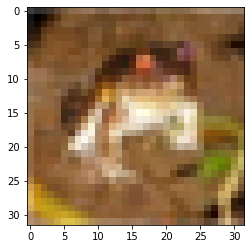

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
print('x_train.shape[0]', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrixs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

x_train.shape[0] (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Model Architecture

Under 3 epochs
* ConvConvPool + ConvConvPool + 128*128 NN + batch_size = 128 --> 183.7s, Test accuracy:  0.541
* ConvConvPool + ConvConvPool + 128*128 NN + batch_size =  32 --> 260.6s, Test accuracy:  0.619
* ConvConvPool + ConvConvPool + 128 NN + batch_size = 128 --> 191.3s, Test accuracy: 0.543
* ConvConvPool + 128*128 NN + batch_size = 128 --> 130.9s, Test accuracy:  0.621

Under 15 epochs
* ConvConvPool + 128 NN + batch_size = 64 --> 743.6s, Test accuracy:  0.698
* ConvConvPool + ConvConvPool + 512 NN + batch_size = 64 --> 1156s, Test accuracy:  0.786

In [5]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), border_mode='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu')) # not required?
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\tenny\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tenny\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

## Training

In [7]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [8]:
import time

start = time.time()

model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs, 
          verbose=1, 
          validation_data=(x_test, y_test))

end = time.time()
print('Process time:', end - start)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 79s 2ms/step - loss: 1.8202 - accuracy: 0.3384 - val_loss: 1.8317 - val_accuracy: 0.3746
Epoch 2/60
50000/50000 [==============================] - 80s 2ms/step - loss: 1.3303 - accuracy: 0.5247 - val_loss: 1.2470 - val_accuracy: 0.5528
Epoch 3/60
50000/50000 [==============================] - 81s 2ms/step - loss: 1.1041 - accuracy: 0.6121 - val_loss: 1.0295 - val_accuracy: 0.6426
Epoch 4/60
50000/50000 [==============================] - 81s 2ms/step - loss: 0.9499 - accuracy: 0.6708 - val_loss: 0.9473 - val_accuracy: 0.6702
Epoch 5/60
50000/50000 [==============================] - 80s 2ms/step - loss: 0.8311 - accuracy: 0.7139 - val_loss: 0.8876 - val_accuracy: 0.7065
Epoch 6/60
50000/50000 [==============================] - 80s 2ms/step - loss: 0.7332 - accuracy: 0.7466 - val_loss: 0.8550 - val_accuracy: 0.7188
Epoch 7/60
50000/50000 [==============================] - 80s 2ms/st

50000/50000 [==============================] - 79s 2ms/step - loss: 0.1661 - accuracy: 0.9523 - val_loss: 1.4458 - val_accuracy: 0.7868
Epoch 57/60
50000/50000 [==============================] - 79s 2ms/step - loss: 0.1661 - accuracy: 0.9535 - val_loss: 1.4594 - val_accuracy: 0.7866
Epoch 58/60
50000/50000 [==============================] - 79s 2ms/step - loss: 0.1708 - accuracy: 0.9526 - val_loss: 1.3962 - val_accuracy: 0.7803
Epoch 59/60
50000/50000 [==============================] - 79s 2ms/step - loss: 0.1611 - accuracy: 0.9542 - val_loss: 1.2066 - val_accuracy: 0.7849
Epoch 60/60
50000/50000 [==============================] - 79s 2ms/step - loss: 0.1607 - accuracy: 0.9560 - val_loss: 1.4424 - val_accuracy: 0.7841
Process time: 4820.499958515167


In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  1.4424301327228546
Test accuracy:  0.7840999960899353


In [10]:
model.save('cifar10-60epochs.model')